In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
#from scipy.integrate import solve_ivp

In [2]:
G=1
m_planet=1
m_Mond=0.02
m_RS=1e-10
R_Planet=1

In [3]:
def F(rvec,masse):
    return -G*m_planet*masse/np.linalg.norm(rvec)**3.0*rvec

In [4]:
def f(t,yvec,masse):
    rvec1=yvec[0:3]
    rvec2=yvec[3:6]
    vvec1=yvec[6:9]
    vvec2=yvec[9:12]
    rvec=rvec1-rvec2
    dvvec1_dt=F(rvec,masse)/m_planet
    dvvec2_dt=-F(rvec,masse)/masse
    results=np.concatenate((vvec1,vvec2,dvvec1_dt,dvvec2_dt))
    return results

In [5]:
def RK4_method(mass,t_initial,t_final,r1_initial,v1_initial,r2_initial,v2_initial,dt):
    N=int((t_final-t_initial)/dt)
    r1=np.zeros((N+1,3))
    v1=np.zeros((N+1,3))
    r2=np.zeros((N+1,3))
    v2=np.zeros((N+1,3))
    t=np.zeros(N+1)
    r1[0]=r1_initial
    v1[0]=v1_initial
    r2[0]=r2_initial
    v2[0]=v2_initial
    t[0]=t_initial
    h=dt
    yn=np.concatenate((r1[0],r2[0],v1[0],v2[0]))
    for n in range(0,N):
        k1=h*f(t[n],yn,mass)
        k2=h*f(t[n]+h/2.0,yn+k1/2.0,mass)
        k3=h*f(t[n]+h/2.0,yn+k2/2.0,mass)
        k4=h*f(t[n]+h,yn+k3,mass)
        k=k1+2.0*k2+2.0*k3+k4
        yn=yn+k/6.0
        r1[n+1]=yn[0:3]
        r2[n+1]=yn[3:6]
        v1[n+1]=yn[6:9]
        v2[n+1]=yn[9:12]
        t[n+1]=t[n]+dt
    return t,r1,r2,v1,v2,N

# a) Low velocity is not enough for circular motion

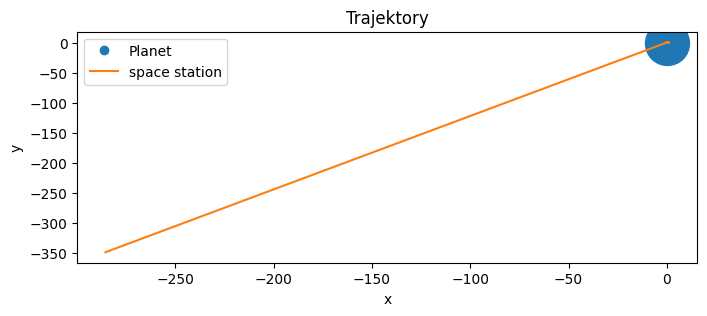

In [6]:
r_planet=np.array([0,0,0])
v_planet=np.array([0,0,0])
r_RS=np.array([1.1,0,0])
v_RS=np.array([0,0.55,0.0])
t_in=0.0
t_fin=100.0
dt=0.1

tt,r1,r2,v1,v2,N=RK4_method(m_RS,t_in,t_fin,r_planet,v_planet,r_RS,v_RS,dt)  #m_RS to m_Mond for the Mond 
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(4*2, 3*1))

ax1.plot(r1[:,0], r1[:,1], 'o', label='Planet')  # It is at fixed poit
ax1.plot(r2[:,0], r2[:,1], label='space station')  # it should go around
plt.scatter(r1[0, 0], r1[0, 1], s=1000) 

ax1.set_title('Trajektory')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
plt.legend()
plt.show()


# 0.7 initial velocity along y threshold for circular motion

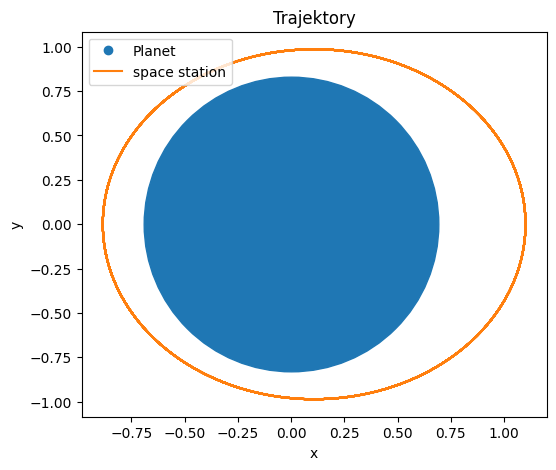

In [7]:
r_planet=np.array([0,0,0])
v_planet=np.array([0,0,0])
r_RS=np.array([1.1,0,0])
v_RS=np.array([0,0.9,0.0])
t_in=0.0
t_fin=100
dt=0.01

tt,r1,r2,v1,v2,N=RK4_method(m_RS,t_in,t_fin,r_planet,v_planet,r_RS,v_RS,dt)  #m_RS to m_Mond for the Mond 
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(4*1.5, 5*1))

ax1.plot(r1[:,0], r1[:,1], 'o', label='Planet')  # It is at fixed poit
ax1.plot(r2[:,0], r2[:,1], label='space station')  # it should go around
plt.scatter(r1[0, 0], r1[0, 1], s=45000) 

ax1.set_title('Trajektory')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
plt.legend()
plt.show()

# b) conservation of energy and angular momentum

In [8]:
def E_tot(rvec,vvec1,vvec2,masse1,masse2):
    Wpot = -G*masse1*masse2/rvec
    Ekin = masse1*np.linalg.norm(vvec1,axis=1)**2/2.0+masse2*np.linalg.norm(vvec2,axis=1)**2/2.0
    return Ekin+Wpot, Ekin, Wpot

# Drehimpuls
def L(rvec1,rvec2,vvec1,vvec2,masse1,masse2):
    L_ang = np.cross(rvec1,vvec1)*masse1+np.cross(rvec2,vvec2)*masse2
    return L_ang



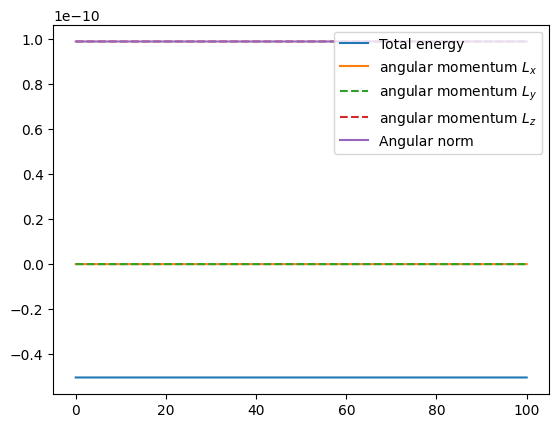

In [111]:
distance=np.linalg.norm(r2-r1,axis=1)
Total_Energy=E_tot(distance,v1,v2,m_planet,m_RS)[0]
Angular_mom=L(r1,r2,v1,v2,m_planet,m_RS)
plt.plot(tt,Total_Energy,label='Total energy')
plt.plot(tt,Angular_mom[:,0],label='angular momentum $L_x$')
plt.plot(tt,Angular_mom[:,1],label='angular momentum $L_y$',linestyle='dashed')
plt.plot(tt,Angular_mom[:,2],label='angular momentum $L_z$',linestyle='dashed')
L_norm=np.linalg.norm(Angular_mom,axis=1)
plt.plot(tt,L_norm,label='Angular norm')
plt.legend(loc='upper right')



# c) Lenz-Runge vector

In [9]:
def LR(rp,rsol,vp,vsol,m1,m2):
    p1=m1*vp
    p2=m2*vsol
    Len_Run=np.cross(p1, np.cross(rp, p1)) +np.cross(p2, np.cross(rsol, p2)) - G * m1 * m2**2 * rsol / np.linalg.norm(rsol)
    return Len_Run


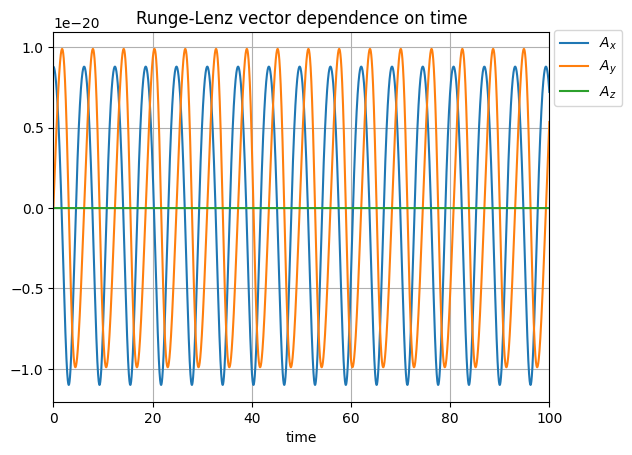

In [10]:
Lenz_Runge=LR(r1,r2,v1,v2,m_planet,m_RS)
plt.plot(tt, Lenz_Runge[:,0],label="$A_x$")
plt.plot(tt, Lenz_Runge[:,1],label="$A_y$")
plt.plot(tt, Lenz_Runge[:,2],label="$A_z$")

plt.xlabel("time")
plt.title("Runge-Lenz vector dependence on time")
plt.grid()
plt.xlim(0,100)
plt.legend(loc=(1.01,0.8))

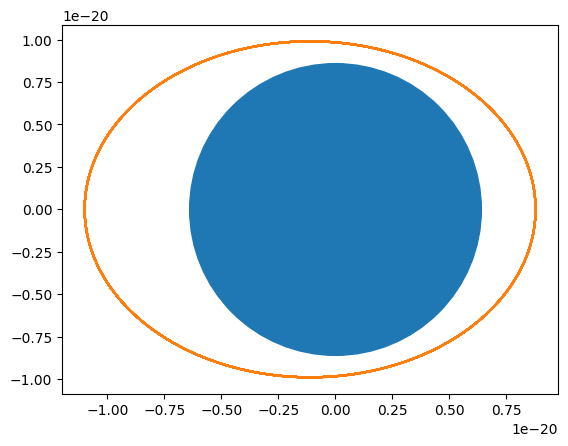

In [11]:
plt.plot(r1[0,0], r1[0,1], 'o', label='Planet', markersize=210)  # It is at fixed poit

plt.plot(Lenz_Runge[:,0], Lenz_Runge[:,1]) 


# d) Euler method

In [12]:
def Euler(mass,t_initial,t_final,r1_initial,v1_initial,r2_initial,v2_initial,dt):
    N=int((t_final-t_initial)/dt)
    r1=np.zeros((N+1,3))
    v1=np.zeros((N+1,3))
    r2=np.zeros((N+1,3))
    v2=np.zeros((N+1,3))
    t=np.zeros(N+1)
    r1[0]=r1_initial
    v1[0]=v1_initial
    r2[0]=r2_initial
    v2[0]=v2_initial
    t[0]=t_initial
    h=dt
    yn=np.concatenate((r1[0],r2[0],v1[0],v2[0]))
    for n in range(0,N):
        k1=h*f(t[n],yn,mass)
        yn=yn+k1
        r1[n+1]=yn[0:3]
        r2[n+1]=yn[3:6]
        v1[n+1]=yn[6:9]
        v2[n+1]=yn[9:12]
        t[n+1]=t[n]+dt
    return t,r1,r2,v1,v2,N

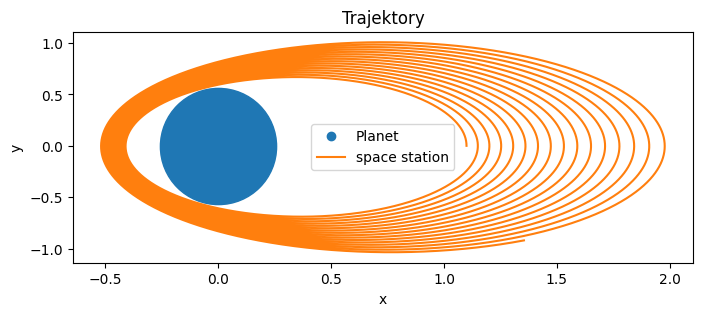

In [17]:
r_planet=np.array([0,0,0])
v_planet=np.array([0,0,0])
r_RS=np.array([1.1,0,0])
v_RS=np.array([0,0.7,0.0])
t_in=0.0
t_fin=100.0
dt=0.001

tt,r1,r2,v1,v2,N=Euler(m_RS,t_in,t_fin,r_planet,v_planet,r_RS,v_RS,dt)  #m_RS to m_Mond for the Mond 
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(4*2, 3*1))

ax1.plot(r1[:,0], r1[:,1], 'o', label='Planet')  # It is at fixed poit
ax1.plot(r2[:,0], r2[:,1], label='space station')  # it should go around
plt.scatter(r1[0, 0], r1[0, 1], s=7000)     #size of the planet

ax1.set_title('Trajektory')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
plt.legend()
plt.show()

# reinitialize time steps for Euler and initial conditions as well

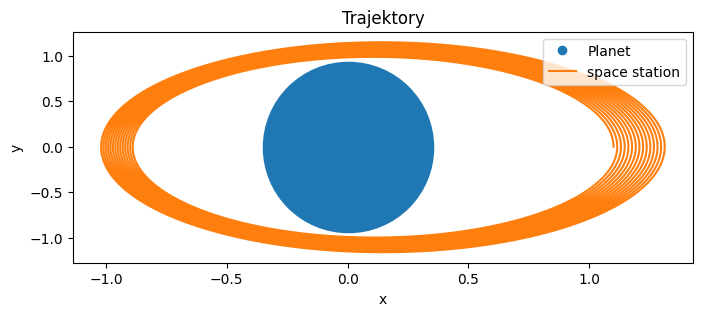

In [18]:
r_planet=np.array([0,0,0])
v_planet=np.array([0,0,0])
r_RS=np.array([1.1,0,0])
v_RS=np.array([0,0.9,0.0])
t_in=0.0
t_fin=100.0
dt=0.001

tt,r1,r2,v1,v2,N=Euler(m_RS,t_in,t_fin,r_planet,v_planet,r_RS,v_RS,dt)  #m_RS to m_Mond for the Mond 
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(4*2, 3*1))

ax1.plot(r1[:,0], r1[:,1], 'o', label='Planet')  # It is at fixed poit
ax1.plot(r2[:,0], r2[:,1], label='space station')  # it should go around
plt.scatter(r1[0, 0], r1[0, 1], s=15000)     #size of the planet

ax1.set_title('Trajektory')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
plt.legend()
plt.show()

In [19]:
from timeit import default_timer as timer
time_taken_Euler=[]
start = timer()
tt,r1,r2,v1,v2,N=Euler(m_RS,t_in,t_fin,r_planet,v_planet,r_RS,v_RS,dt)  #m_RS to m_Mond for the Mond 
end = timer()
time_taken_Euler.append(end-start)
print(time_taken_Euler)




[1.12146863199996]


In [20]:
time_taken_RK=[]
start = timer()
tt,r1,r2,v1,v2,N=RK4_method(m_RS,t_in,t_fin,r_planet,v_planet,r_RS,v_RS,dt)  #m_RS to m_Mond for the Mond 
end = timer()
time_taken_RK.append(end-start)
print(time_taken_RK)

[4.06923593700003]


# f) Air friction

In [54]:


def Ffric(deltar12,deltav):
    A=0.001
    C_W=1.0
    rho_0=1
    hs=1.05
    rho=rho_0*np.exp(-(np.abs(np.linalg.norm(deltar12))-r_planet)/hs)
    F=-1.0/2.0*rho*(deltav)**2*C_W*A
    return F

def f(t,yvec,masse):
    rvec1=yvec[0:3]
    rvec2=yvec[3:6]
    vvec1=yvec[6:9]
    vvec2=yvec[9:12]
    rvec=rvec2-rvec1
    vvec=vvec2-vvec1
    dvvec1_dt=F(rvec,masse)/m_planet
    dvvec2_dt=-F(rvec,masse)/masse+Ffric(rvec,vvec)/masse
    results=np.concatenate((vvec1,vvec2,dvvec1_dt,dvvec2_dt))
    return results

In [55]:
def RK4_method_Fric(mass,t_initial,t_final,r1_initial,v1_initial,r2_initial,v2_initial,dt):
    N=int((t_final-t_initial)/dt)
    r1=np.zeros((N+1,3))
    v1=np.zeros((N+1,3))
    r2=np.zeros((N+1,3))
    v2=np.zeros((N+1,3))
    t=np.zeros(N+1)
    r1[0]=r1_initial
    v1[0]=v1_initial
    r2[0]=r2_initial
    v2[0]=v2_initial
    t[0]=t_initial
    h=dt
    yn=np.concatenate((r1[0],r2[0],v1[0],v2[0]))
    for n in range(0,N):
        k1=h*f(t[n],yn,mass)
        k2=h*f(t[n]+h/2.0,yn+k1/2.0,mass)
        k3=h*f(t[n]+h/2.0,yn+k2/2.0,mass)
        k4=h*f(t[n]+h,yn+k3,mass)
        k=k1+2.0*k2+2.0*k3+k4
        yn=yn+k/6.0
        r1[n+1]=yn[0:3]
        r2[n+1]=yn[3:6]
        v1[n+1]=yn[6:9]
        v2[n+1]=yn[9:12]
        t[n+1]=t[n]+dt
    return t,r1,r2,v1,v2,N

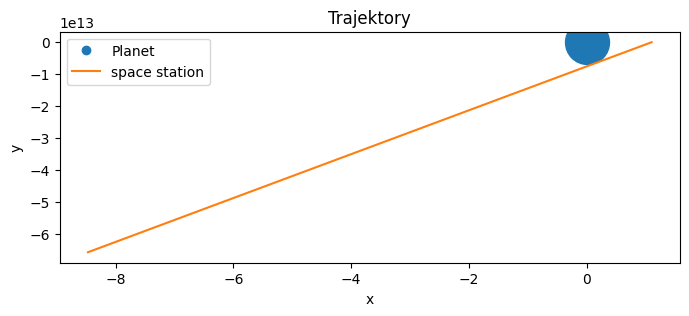

In [56]:
r_planet=np.array([0,0,0])
v_planet=np.array([0,0,0])
r_RS=np.array([1.1,0,0])
v_RS=np.array([0,1.1,0.0])
t_in=0.0
t_fin=100.0
dt=0.01

tt,r1,r2,v1,v2,N=RK4_method_Fric(m_RS,t_in,t_fin,r_planet,v_planet,r_RS,v_RS,dt)  #m_RS to m_Mond for the Mond 
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(4*2, 3*1))

ax1.plot(r1[:,0], r1[:,1], 'o', label='Planet')  # It is at fixed poit
ax1.plot(r2[:,0], r2[:,1], label='space station')  # it should go around
plt.scatter(r1[0, 0], r1[0, 1], s=1000) 

ax1.set_title('Trajektory')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
plt.legend()
plt.show()